# Read data

In [1]:
import pandas as pd
import numpy as np

# read news results dataset
dataset_A = pd.read_csv(f'data/dataset_A.csv')

# read Google associated dataset
dataset_C = pd.read_csv(f'data/dataset_C.csv')

# read Google independent dataset
dataset_D = pd.read_csv(f'data/dataset_D.csv')

# include only the participants that were part of the statistical test
set_participants = set(dataset_A[dataset_A['is_selected_result']]['participant'])


# Engagement and exposure in diffferent datasets

## Engagement on Dataset C (Google associated domain visits)

In [2]:

# visits per participant per domain (in descend order to assign the rank appropiatedly)
visits_C = dataset_C.groupby(
    ['participant', 'coredomain']).size().rename(
    'visits').reset_index().sort_values('visits', ascending=False)

# assign the rank of the engagement, the more engagement to a domain the higher the rank 
# (note that the highest rank is 1, followed by 2). So, the highest rank has the lowest value
visits_C['engagement_rank'] = visits_C.groupby('participant').cumcount() + 1

# calculate the engagement (visits to domain divided by all visits)
visits_C['total_visits'] = visits_C.groupby('participant')['visits'].transform('sum')
visits_C['engagement'] = visits_C['visits'] / visits_C['total_visits']

# calculate the number of unique domains per participant
unique_domain_visits_C = pd.concat([
    pd.Series(list(set_participants)).rename('participant').to_frame().set_index('participant'),
    visits_C.groupby('participant')['coredomain'].nunique().rename('unique_domains')
], axis=1)

# if a participant did not visit any domain, then make sure it is a 0 and not a NaN
unique_domain_visits_C['unique_domains'] = unique_domain_visits_C['unique_domains'].fillna(0)



## Engagement on Dataset D (Google independent domain visits)

In [3]:

# visits per participant per domain (in descend order to assign the rank appropiatedly)
visits_D = dataset_D.groupby(
    ['participant', 'coredomain']).size().rename(
    'visits').reset_index().sort_values('visits', ascending=False)

# assign the rank of the engagement, the more engagement to a domain the higher the rank 
# (note that the highest rank is 1, followed by 2). So, the highest rank has the lowest value
visits_D['engagement_rank'] = visits_D.groupby('participant').cumcount() + 1

# calculate the engagement (visits to domain divided by all visits)
visits_D['total_visits'] = visits_D.groupby('participant')['visits'].transform('sum')
visits_D['engagement'] = visits_D['visits'] / visits_D['total_visits']

# calculate the number of unique domains per participant
unique_domain_visits_D = pd.concat([
    pd.Series(list(set_participants)).rename('participant').to_frame().set_index('participant'),
    visits_D.groupby('participant')['coredomain'].nunique().rename('unique_domains')
], axis=1)

# if a participant did not visit any domain, then make sure it is a 0 and not a NaN
unique_domain_visits_D['unique_domains'] = unique_domain_visits_D['unique_domains'].fillna(0)



## Engagement  based on only selected results in dataset A (Google Search results )

In [4]:
# visits_A.groupby('participant')['coredomain'].nunique().rename('unique_domains')

In [5]:
# dataset_D['participant'].value_counts(dropna=False)

In [6]:
clicks_dataset_A = dataset_A[dataset_A['is_selected_result']]

# visits per participant per domain (in descend order to assign the rank appropiatedly)
visits_A  = clicks_dataset_A.groupby([
    'participant', 'coredomain']).size().rename(
    'visits').reset_index().sort_values('visits', ascending=False)

# assign the rank of the engagement related to Google Search, the more engagement to a domain the higher
# the rank (not that the highest rank is 1, followed by 2). So, the highest rank has the lowest value
visits_A['engagement_rank'] = visits_A.groupby('participant').cumcount() + 1

# calculate the engagement (visits to domain divided by all visits)
visits_A['total_visits'] = visits_A.groupby('participant')['visits'].transform('sum')
visits_A['engagement'] = visits_A['visits'] / visits_A ['total_visits']

# calculate the number of unique domains per participant
unique_domain_visits_A = pd.concat([
    pd.Series(list(set_participants)).rename('participant').to_frame().set_index('participant'),
    visits_A.groupby('participant')['coredomain'].nunique().rename('unique_domains')
], axis=1)


# if a participanct did not go to any domain resulting from a Google search page, then something is wrong.
# Only participants that performed searches and that selected at least one of the news articles in the results
# were included in the analyses.
if unique_domain_visits_A['unique_domains'].isnull().any():
    raise Exception('Participants should have viisted to at least one domain. ',
                    'Otherwise they were not part of the analysis.')

In [7]:
unique_domain_visits_A[unique_domain_visits_A['unique_domains'].isnull()]

,unique_domains
participant,


## Exposure in dataset A (Google results)

In [8]:

# number of times a domain was exposed to a participant in Google results (dataset A)
exhibits_dataset_A  = dataset_A.groupby(
    ['participant', 'coredomain']).size().rename(
    'exhibits').reset_index().sort_values('exhibits', ascending=False)

# assign the rank of the exposure, the more exposure to a domain the higher the rank 
# (note that the highest rank is 1, followed by 2). So, the highest rank has the lowest value
exhibits_dataset_A['exposure_rank'] = exhibits_dataset_A.groupby('participant').cumcount() + 1

# calculate the exposure (exhibits of domain divided by all exhibits)
exhibits_dataset_A['total_exhibits'] = exhibits_dataset_A.groupby('participant')['exhibits'].transform('sum')
exhibits_dataset_A['exposure'] = exhibits_dataset_A['exhibits'] / exhibits_dataset_A ['total_exhibits']

# calculate the number of unique domains shown to each participant
unique_domain_exhibits_A = pd.concat([
    pd.Series(list(set_participants)).rename('participant').to_frame().set_index('participant'),
    exhibits_dataset_A.groupby('participant')['coredomain'].nunique().rename('unique_domains')
], axis=1)

# if a participant was not exposed to any domain then something is wrong. Only participants that 
# performed searches that resulted in pages with news articles were included. Thus, they were exposed
# to news domains
if unique_domain_exhibits_A['unique_domains'].isnull().any():
    raise Exception('Participants should be exposed to at least one domain. ',
                    'Otherwise they were not part of the analysis.')

## Engagement on Dataset D + selected results in dataset A

In [9]:
# distribution that includes both Google and not Google Search engagement
visits_D_and_A = pd.concat([visits_D, visits_A])

# calculate the number of unique domains per participant
unique_domain_visits_D_and_A = pd.concat([
    pd.Series(list(set_participants)).rename('participant').to_frame().set_index('participant'),
    visits_D_and_A.groupby('participant')['coredomain'].nunique().rename('unique_domains')
], axis=1)

unique_domain_visits_D_and_A['unique_domains'] = unique_domain_visits_D_and_A['unique_domains'].fillna(0)

In [10]:
visits_A.participant.value_counts()

p61     42
p49     28
p18     24
p40     24
p16     18
        ..
p128     1
p250     1
p251     1
p129     1
p99      1
Name: participant, Length: 280, dtype: int64

# Plot engagements and exposures

only 15 out of 57 displayed
only 15 out of 63 displayed


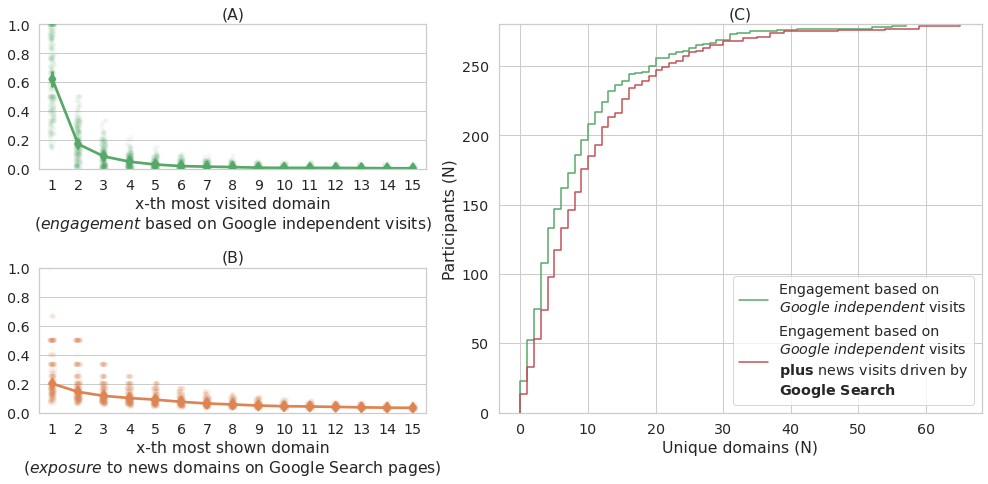

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn plot style
sns.set(style='whitegrid', font_scale=1.3)

# define grid of plot, with width ration
fig, ax = plt.subplots(2,2, figsize=(14,7), gridspec_kw={'width_ratios': [4, 5]})

# spit the grid according to where the plots should appear

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, fig=fig)
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1, fig=fig)
ax3 = plt.subplot2grid((2, 2), (0, 1), rowspan=2, fig=fig)
ax = [ax1, ax2, ax3]

#####################################
# Plot A: Engagement outside Google #
#####################################

# limit the plot the most visited domains (15 to not confuse with Google rank)
print(f"only 15 out of {visits_D['engagement_rank'].max()} displayed")
toplot = visits_D[visits_D['engagement_rank'] <= 15]

# show each observation with a scatterplot
sp = sns.stripplot(x='engagement_rank', 
                   y='engagement', 
                   data=toplot, 
                   color = sns.color_palette()[2],
                   size=5, 
                   alpha=.05, 
                   ax=ax[0]
                  )

# display the full possible range of values
sp.set(ylim=(0, 1))

# show the median
pp = sns.pointplot(x='engagement_rank', 
                   y='engagement', 
                   data=toplot,
                   join=True, 
                   estimator=np.median,
                   markers='d', 
                   scale=1, ci=95, 
                   color = sns.color_palette()[2],
                   ax=ax[0]
                  )

# name of labels
pp.set_ylabel('')
pp.set_xlabel('x-th most visited domain\n($\it{engagement}$ based on Google independent visits)')
pp.set_title('(A)')


####################
# Plot B: Exposure #
####################

# limit the plot the most visited domains (15 to not confuse with Google rank)
print(f"only 15 out of {exhibits_dataset_A['exposure_rank'].max()} displayed")
toplot = exhibits_dataset_A[exhibits_dataset_A['exposure_rank'] <= 15]

# Show each observation with a scatterplot
sp = sns.stripplot(x='exposure_rank', 
                   y='exposure', 
                   data=toplot, 
                   color= sns.color_palette()[1],
                   size=5, 
                   alpha=.05, 
                   ax=ax[1]
                  )

# display the full possible range of values
sp.set(ylim=(0, 1))


# show the median
pp = sns.pointplot(x='exposure_rank', 
                   y='exposure', 
                   data=toplot,
                   join=True, 
                   estimator=np.median,
                   markers='d', 
                   scale=1, 
                   ci=95,
                   color = sns.color_palette()[1],
                   ax=ax[1]
                  )

# name the labels
pp.set_ylabel('')
pp.set_xlabel('x-th most shown domain\n($\it{exposure}$ to news domains on Google Search pages)')
pp.set_title('(B)')

#####################################
# Plot C: Cummulative distributions #
#####################################

# engagement in Google independent visits
ep = sns.ecdfplot(data=unique_domain_visits_D,  
                  x='unique_domains', 
                  stat='count', 
                  ax=ax[2],  
                  color=sns.color_palette()[2], 
                  label = 'Engagement based on \n$\it{Google\ independent}$ visits')


# engagement in Google independent visits plus visits led by Google search results
toplot_D_and_A = unique_domain_visits_D_and_A.copy()

# Substract one domain to de-bias the sample. The criteria of selection of participants was based
# on having one Google Search query, which means at least one Google Associated visit, therefore
# to make sure that the effect is not due to the selection criteria, we remove one unique domain
toplot_D_and_A['unique_domains'] = toplot_D_and_A['unique_domains'] - 1
ep = sns.ecdfplot(data=toplot_D_and_A,  
                  x='unique_domains', 
                  stat='count', 
                  ax=ax[2], 
                  color=sns.color_palette()[3], 
                  label = 'Engagement based on \n$\it{Google\ independent}$ visits\n$\\bf{plus}$ news visits driven by\n$\\bf{Google\ Search}$ ')



# name of labels
ep.set_ylabel('Participants (N)')
ep.set_xlabel('Unique domains (N)')
ep.set_title('(C)')
ep.legend()
# ep.xaxis.grid(False)


plt.tight_layout()



# Descriptives and post-hoc tests

## Increment of total visits via Google Search

In [12]:
# consider only the ones that were match
news_matches = dataset_A[dataset_A['is_selected_result']]

print('Google independent visits:', len(dataset_D))
print('News visits driven by Google Search:', f'{len(news_matches)},',
      'i.e.,', len(news_matches), f'selected news articles (out of {len(dataset_A)}) in', 
      len(news_matches['search_page'].unique()), 'search pages')

print('\nIncrease in the sample of Google independent visits when', 
      'the news visits driven by Google Search are added:', round(100 * len(news_matches) / len(dataset_D),2), '%')

Google independent visits: 62893
News visits driven by Google Search: 1269, i.e., 1269 selected news articles (out of 5380) in 1221 search pages

Increase in the sample of Google independent visits when the news visits driven by Google Search are added: 2.02 %


## News sources "discovered" by Google Search:
**Google independent** vs **Google Search Driven w/o sources visited by Google independent visits**

In [13]:
# news articles that were driven by Google Search
selected_results = dataset_A[dataset_A['is_selected_result']]

# merge with with the combinations of participant and domain that were visited outside google
selected_results = selected_results.merge(
    dataset_D[['participant', 'coredomain']].drop_duplicates(),
    how='left', on=['participant', 'coredomain'], indicator=True)

# the indicator of the merge will indicate if the user visited the domain outside of google
selected_results['annotation'] = selected_results['_merge'].map(
    {'left_only': 'Not visited outside Google',
     'both': 'Visited independently of Google'})

print('Distribution of visits driven by Google Search to domains that were not visited independently of Google')
a = selected_results.annotation.value_counts(dropna=False)
b = selected_results.annotation.value_counts(dropna=False, normalize=True) * 100
print(pd.concat([a,b], axis=1, keys=['counts', '%']))

# newly discovered domains per participant
print('\nNew domains "discovered" by Google Search:')
print(statsA_no_D := selected_results.drop_duplicates(['participant', 'coredomain', 'annotation']).groupby([
    'participant', 'annotation']).size().unstack()['Not visited outside Google'].fillna(0).describe())

# Diversity of google independent visits
print('\nNews domains visited outside of Google')
print(statsD := dataset_D.drop_duplicates(['participant', 'coredomain',]).groupby([
    'participant']).size().describe())

print('\nTotal increment:', 100* statsA_no_D['mean'] / statsD['mean'])

Distribution of visits driven by Google Search to domains that were not visited independently of Google
                                 counts          %
Not visited outside Google          887  69.897557
Visited independently of Google     382  30.102443

New domains "discovered" by Google Search:
count    280.000000
mean       2.875000
std        2.941865
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       24.000000
Name: Not visited outside Google, dtype: float64

News domains visited outside of Google
count    257.000000
mean       8.887160
std        9.248676
min        1.000000
25%        3.000000
50%        6.000000
75%       11.000000
max       57.000000
dtype: float64

Total increment: 32.350043782837126


## Concentration of visits and exhibits

In [14]:
print('Within participant')
print('top-3 domains concentrates', 
      100*visits_D[visits_D['engagement_rank'] <= 3].groupby('participant')['engagement'].sum().mean(), 
      '% of the visits')

print('top-3 domains concentrates', 
      100*exhibits_dataset_A[exhibits_dataset_A['exposure_rank'] <= 3].groupby('participant')['exposure'].sum().mean(), 
      '% of the exhibits')


print('\nOverall:')
visits_per_domain = visits_D.groupby('coredomain')['visits'].sum().sort_values(ascending=False)
print('top-3 domains concentrates', 
      100*visits_per_domain[:3].sum() / visits_per_domain.sum(), 
      '% of the visits')
exhibits_per_domain = exhibits_dataset_A.groupby('coredomain')['exhibits'].sum().sort_values(ascending=False)
print('top-3 domains concentrates', 
      100*exhibits_per_domain[:3].sum() / exhibits_per_domain.sum(), 
      '% of the exhibits')

Within participant
top-3 domains concentrates 87.89310258837497 % of the visits
top-3 domains concentrates 56.09366721299769 % of the exhibits

Overall:
top-3 domains concentrates 51.19647655541952 % of the visits
top-3 domains concentrates 13.468703427719822 % of the exhibits


## Compare the distributions of unique domains

In [15]:
from scipy.stats import kstest

# Note that we substract 1 domain to de-bias the sample. The criteria of selection of participants 
# was based on having one Google Search query, which means at least one Google Associated visit, 
# therefore to make sure that the effect is not due to the selection criteria, we remove 1 unique domain.

print('Kolmogorov-Smirnov test to compare the distributions:\n')
print('Degrees of Freedom: ', len(unique_domain_visits_D) - 2 )
print('\nGoogle independent vs Google independent + Google Search driven visits')
print(kstest(unique_domain_visits_D['unique_domains'], unique_domain_visits_D_and_A['unique_domains'] - 1))
print('\nGoogle independent vs Google associated')
print(kstest(unique_domain_visits_D['unique_domains'], unique_domain_visits_C['unique_domains'] - 1))
print('\nGoogle associated vs Google independent + Google Search driven visits')
print(kstest( unique_domain_visits_C['unique_domains'] - 1, unique_domain_visits_C['unique_domains'] - 1))

Kolmogorov-Smirnov test to compare the distributions:

Degrees of Freedom:  278

Google independent vs Google independent + Google Search driven visits
KstestResult(statistic=0.125, pvalue=0.02508576205059103)

Google independent vs Google associated
KstestResult(statistic=0.14642857142857144, pvalue=0.004886689156803134)

Google associated vs Google independent + Google Search driven visits
KstestResult(statistic=0.0, pvalue=1.0)
